# Выявление профилей потребления

### Задача:

#### Сегментировать покупателей по профилю потребления, проанализировать покупки в интернет-магазине товаров для дома и быта «Пока все ещё тут» для индивидуальной рекламной рассылки.

### Исследовательский анализ данных:
- Импорт библиотек и файлов;
- Общая информация о данных, типы данных;
- Обработка пропусков и дубликатов;
- Определение и исправление ошибок в данных;
- Создание дополнительных столбцов
    - месяц;
    - сумма покупки;
    - Категория товара;
- Обзор данных и изменений.

### Изучение данных:
- Общие характеристики данных:
    - Уникальные данные;
    - describe
- Количество товаров в заказе;
- Цена товара и сумма покупки;
- Количество категорий в заказах;
- Выводы по иссделованию данных;

### Сегментирование пользователей:
- Сегментация Датасет машинным обучением;
- Создание таблицы с сырыми данными;
- Создание таблицы с очищенными данными;
- Cтатистическая значимость различий по сумме покупок Total по сырым и очищенным данным:
    - H0 - для различных кластеров клиентов, сумма покупок не отличается от аналогичного показателя другого класетра.
    - H1 - между показателями наблюдаются существенные различия.
- Cтатистическая значимость различий по средней покупке по сырым и очищенным данным:
    - H0 - Для различных кластеров, средняя покупка не отличается от аналогичного показателя другого кластера.
    - H1 - между показателями наблюдаются существенные различия.
- Вывод.

### Исследуем поведение покупателей по кластерам:
- Средний чек по кластерам в разрезе категорий;
- Частота покупок по категориям;
- Количество товаров в покупке по категориям;
- Сезонные показатели выручки по кластерам;
- Вывод.



### Кумулятивные показатели по товарным категориям
- Кумулятивная выручка по категориям;
- Кумулятивный средняя покпка по категориям;
- Cтатистическая значимость различий в показателях:
    - Н0 - нет различия в категориях;
    - Н1 - есть различия в категориях
- Вывод.

### Общий вывод.
#### Рекомендации.    

### Дополнительные материалы:
###### - Презентация: [Выявление профилей потребления](https://drive.google.com/file/d/1VbuD7igm3M27j1TkTTdVA6FignM_ftqP/view?usp=sharing)
###### -  Дашборд: [Показатели интернет-магазина](https://public.tableau.com/app/profile/.67426837/viz/_16783517102310/Dashboard1?publish=yes)

## Исследовательский анализ данных
### Импорт библиотек и файла

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
from IPython import display
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('mode.chained_assignment', None)
# This code will not complain!
pd.reset_option("mode.chained_assignment")

from scipy import stats as st

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
try:
    df = pd.read_csv('https://code.s3.yandex.net//datasets/ecommerce_dataset.csv')
except:
    df = pd.read_csv('ecommerce_dataset.csv')

### Общая информация о данных

In [3]:
df.sample(10)

,date,customer_id,order_id,product,quantity,price
253,2018101418,fe2c35d8-a51a-45f3-bd85-27490d1d947a,68647,Сушилка для белья потолочно-настенная Gimi Lif...,1,2174.0
838,2018111701,2c2b3410-8218-4671-a208-4d20ed55056a,69028,"Муляж Черешня 10 штук d 2,5 см, цвет в ассорти...",1,74.0
268,2018101611,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68661,Штора для ванной комнаты Diamante 240х200 см б...,4,1199.0
1187,2018121221,954172a5-634c-4a50-941d-9db6d15a7377,69332,Муляж Яблоко зеленый 9 см полиуретан,2,59.0
278,2018101711,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68668,Щетка для посуды *Мила* SV3182 1807009,50,27.0
1549,2019011910,4d416cec-6f5b-4444-9b50-08770397714b,14521,Пеларгония зональная диам. 12 см темнорозовая ...,1,188.0
3378,2019050216,760aa067-90c3-4794-b7a9-a8831197388b,14715,Примула комнатная D9 см красная,1,98.0
2201,2019030523,4f7a63fc-8438-4c3a-a895-765bf982715d,70620,Жестяная банка Горошек Ц099h145v110-01321,1,134.0
3688,2019051315,823281f4-c5da-456d-92e3-9b438916943e,14761,Рассада Капусты белокачанная сорт Грибовский к...,1,120.0
5130,2019061117,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Сосновский, кассета по 6шт",1,120.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


Данные представлены в виде таблицы, включающей в себя 6 737 строк и 6 столбцов. 
3 столбца тип данных < int64 >), 1 столбец типа < float >, 2 столбца типа < object >.

Содержание данных:
- date — дата заказа;
- customer_id — идентификатор покупателя;
- order_id — идентификатор заказа;
- product — наименование товара;
- quantity — количество товара в заказе;
- price — цена товара.

Необходимо заменить тип данных в столбце date. Пропусков данных нет.

In [5]:
df['date'] = pd.to_datetime(df['date'],format='%Y%m%d%H')
df.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


### Обработаем пропуски и дубликаты

In [6]:
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
date,0.000000
customer_id,0.000000
order_id,0.000000
product,0.000000
quantity,0.000000
price,0.000000


In [7]:
df.duplicated().sum() #проверим явные полные дубликаты

0

Полных дубликатов не выявлено. Приведем названия продуктов к нижнему регистру и проверим неявные дубликаты.


In [8]:
df['product']= df['product'].str.lower()

Проверим дубликаты по 5 уникальным колонкам: 'customer_id', 'order_id', 'product' 'quantity', 'price'

In [9]:
df.duplicated(['customer_id', 'order_id', 'product', 'quantity', 'price']).sum()

1864

Выявлено 1864 неявных дубликатов: вероятно выгрузка предоставлена из разных систем, что создало дубли в разные даты.
Удалим неявные дубликаты

In [10]:
df = df.drop_duplicates (subset=['customer_id', 'order_id', 'product', 'quantity', 'price']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4873 entries, 0 to 6735
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4873 non-null   datetime64[ns]
 1   customer_id  4873 non-null   object        
 2   order_id     4873 non-null   int64         
 3   product      4873 non-null   object        
 4   quantity     4873 non-null   int64         
 5   price        4873 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 266.5+ KB


#### Проверим на наличие заказов совершенных более чем одним покупателем.

In [11]:
df.groupby(['order_id'] ).agg({'customer_id': ['nunique']})\
    ['customer_id'].sort_values(by='nunique', ascending=False).head()

,nunique
order_id,
72845,4
71480,3
69485,3
69310,2
69833,2


In [12]:
df = df.drop_duplicates (subset=['order_id', 'product']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4817 entries, 0 to 6735
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4817 non-null   datetime64[ns]
 1   customer_id  4817 non-null   object        
 2   order_id     4817 non-null   int64         
 3   product      4817 non-null   object        
 4   quantity     4817 non-null   int64         
 5   price        4817 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 263.4+ KB


### Создадим дополнительные столбцы

In [13]:
df['total'] = df['price'] * df['quantity'] # Полная стоимость товара
df['month'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m') 
df.head()

,date,customer_id,order_id,product,quantity,price,total,month
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,2018-10
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,194.0,2018-10
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,112.0,2018-10
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0,2018-10
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,112.0,2018-10


#### Cоздадим столбец категория товара

In [14]:
df['typ'] = df['product'].apply(lambda x: x.split(' ')[0]) # выберем по 1 слову в названии товара
df.typ.unique()

array(['комнатное', 'радермахера', 'хризолидокарпус', 'циперус',
       'шеффлера', 'юкка', 'настенная', 'таз', 'чехол', 'вешалка',
       'сушилка', 'крючок', 'корзина', 'мини-сковорода', 'сковорода',
       'стеклянная', 'доска', 'сумка-тележка', 'многолетнее', 'рассада',
       'муляж', 'щетка-сметка', 'сумка', 'тарелка', 'вилка', 'ложка',
       'нож', 'герань', 'ерш', 'пеларгония', 'котел', 'суккулент',
       'эхеверия', 'набор', 'коврик', 'подкладка', 'дозатор', 'ёрш',
       'эвкалипт', 'цветок', 'мусорный', 'плед', 'скатерть', 'кувшин',
       'адиантум', 'ковер', 'перчатки', 'стремянка', 'гладильная',
       'лестница-стремянка', 'толкушка', 'тележка', 'готовая',
       'искусственный', 'простыня', 'чайник', 'штора', 'банка', 'стяжка',
       'комплект', 'кампанула', 'декоративная', 'противень', 'калатея',
       'нолина', 'плечики', 'подушка', 'полотенце', 'хлорофитум',
       'цикламен', 'крепеж', 'пружина', 'глоксиния', 'азалия',
       'гортензия', 'хризантема', 'петля', 

In [15]:
def category(row):
    if row['typ'] in {'настенная', 'таз', 'чехол', 'вешалка',
       'сушилка', 'крючок', 'корзина',  'сумка-тележка', 
       'муляж', 'щетка-сметка', 'сумка', 
        'ерш',  'котел',  'набор', 'коврик', 'подкладка', 'дозатор', 'ёрш',
      'мусорный',  'ковер', 'перчатки', 'стремянка', 'гладильная',
       'лестница-стремянка', 'тележка', 'готовая',
       'искусственный', 'банка', 'стяжка', 'комплект', 'декоративная',  'плечики',  'крепеж', 'пружина', 
       'петля', 'салфетка', 'вкладыши',  'кофр', 'стиральный', 'чистящий',  'щетка',
       'стремянки', 'щетка-утюжок', 'светильник', 'жидкое', 'ковёр', 'пена', 'подрукавник', 
       'сверло-фреза,', 'контейнер', 'зубная', 'карниз', 'веник', 'швабра', 'ящик',
       'подголовник', 'ведро', 'короб', 'коробка', 'насадка',  'вешалка-плечики',
       'настольная', 'сиденье',  'корыто', 'холодная',  'шнур', 'урна',
        'мыло', 'сметка', 'измерительный', 'линейка,', 'средство',
       'бензин', 'паста', 'петля-стрела', 'вешалка-стойка', 'держатель', 'пробка',
       'лоток', 'вешалки', 'губка', 'антижир', 'универсальное', 'ролик', 'сменный',
       'термометр', 'шило', 'кисточка','скребок', 'комод', 'ароматизированное',
       'бальзам',  'жестяная', 'рассекатель', 'ополаскиватель', 'сетка',  'весы', 'подставка', 'вешалка-сушилка', 
        'ручка-скоба', 'пресс', 'новогоднее','мыльница', 'защитный', 'многофункциональный', 'стремянка-табурет',
       'кольца', 'вантуз',  'фоторамка', 'этажерка','кондиционер','полки', 'ключница', 'складная', 'емкость',
        'защитная', 'гипоаллергенный', 'вешалка-перекладина',
       'модульная', 'лестница', 'искусственная',  'совок', 'нетканые',
       'фал', 'штанга', 'увлажняющая', 'подарочный','штангенциркуль',
       'мыло-скраб', 'скалка', 'рукав','концентрат',  'полка', 'окномойка',
       'урна-пепельница', 'сменная',  'насадка-моп',
       'автоматическая', 'тряпкодержатель', 'бельевые', 'сверло', 'фиксатор-шар', 
       'обувница-3',  'отжим',    'шпагат',  'стеллаж',  'складной',  'ванна',
        'корзинка', 'ваза', 'вигна',   'отделитель', 'шприц', 'крышка', 
       'покрытие', 'веревка', 'мешок',  'отбеливатель', 'завертка', 'ручка', 
        'пьезозажигалка', 'решетка','запасная', 'щётка', 'универсальный', 'уголок',  'тряпка', 
       'основание', 'стяжки', 'шпингалет' }:
        return 'Хозтовары'
    elif row['typ'] in {'мини-сковорода', 'сковорода',
       'стеклянная', 'доска', 'тарелка', 'вилка', 'ложка',
       'нож', 'котел',  'кувшин','толкушка',   'банка', 'противень',
       'tepмокружка',  'ножеточка', 'сервировочная', 'салатник', 'чайный', 'рыбочистка', 
       'терка', 'кружка', 'лопатка', 'ковш',
       'салфетница', 'стакан', 'столовая', 'чайная', 'овощечистка', 
       'измельчитель',  'кухонные', 'картофелемялка', 'миска', 'пресс', 'термостакан',
       'термокружка', 'термос', 'столовый', 'блюдце', 'бульонница', 'разделочная',
       'просеиватель', 'кастрюля',  'хлебница',  'форма', 'орехоколка', 'скалка',
       'венчик', 'сито', 'бак','блюдо', 'сахарница', 'половник',  
       'мерный','чайник', 'миксер','утюг', 'овощеварка','фен','электроштопор', 'мантоварка-пароварка','пылесос',
                       'соковарка','соковыжималка','вакуумный','кипятильник'} :
        return 'Кухня'
    elif row['typ'] in {'плед', 'скатерть', 'простыня','штора','подушка', 'полотенце', 'наматрасник',
       'наматрицник-чехол','халат', 'покрывало','одеяло','простынь','махровое','кухонное','ткань',    'наматрацник', 
                        'наволочка', 'пододеяльник','двуспальное'} :
        return 'Текстиль'
    else:
        return 'Растения'
df['category'] = df.apply(category, axis=1)

In [16]:
df.info() #Проверим все ли строки получили категорию

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4817 entries, 0 to 6735
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4817 non-null   datetime64[ns]
 1   customer_id  4817 non-null   object        
 2   order_id     4817 non-null   int64         
 3   product      4817 non-null   object        
 4   quantity     4817 non-null   int64         
 5   price        4817 non-null   float64       
 6   total        4817 non-null   float64       
 7   month        4817 non-null   object        
 8   typ          4817 non-null   object        
 9   category     4817 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 414.0+ KB


In [17]:
category=df.groupby('category').agg({'product':'nunique'}).sort_values(by='product', ascending=False).round(2)

category

,product
category,
Хозтовары,1062
Растения,944
Кухня,218
Текстиль,117


In [18]:
df = df.drop('typ', axis=1) #удалим столбец typ
df.head()

,date,customer_id,order_id,product,quantity,price,total,month,category
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,2018-10,Растения
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,194.0,2018-10,Растения
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,112.0,2018-10,Растения
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0,2018-10,Растения
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,112.0,2018-10,Растения


In [19]:
print('Минимальная дата:', df['date'].min())
print('Максимальная дата:', df['date'].max())

Минимальная дата: 2018-10-01 00:00:00
Максимальная дата: 2019-10-31 14:00:00


### Обзор данных и проведенных изменений:
- В файле данные о 6 737 транзакциях в интернет-магазине;
- Данные:
    - дата заказа, 
    - ID покупателя, 
    - ID заказа, 
    - наименованиях товара,
    - количестве товара в заказе, 
    - цена товара.
- Явных дубликатов не выявлено.
- Выявлены неявные добликаты по столбцам без учета даты, вероятная причина -  особенность выгрузки из 2 систем.
- Удалены неявные дубликаты
- Выявлены заказы, соершенные несколькими пользователями - ошибка выгрузки. Удалены
- Созданы 3 столбца: 
    - Общая стоимость товаров, 
    - Месяц, 
    - Категория
- По итогам обработки осталось 4 817 записи.
- Временной промежуток по транзакциям:
    - Минимальная дата: 2018-10-01 00:00:00
    - Максимальная дата: 2019-10-31 14:00:00


## Изучение данных

### Общие характеристики данных

In [20]:
df.nunique()

date           2202
customer_id    2421
order_id       2784
product        2341
quantity         49
price           360
total           648
month            13
category          4
dtype: int64

В очищенном от дубликатов датасете имеются данные по покупкам 2451 клиента, 2784 покупки - повторная покупка редкость.

Всего 2341 продукт в ассортименте. Их поделили на 4 категорий.

In [21]:
df.describe()

,order_id,quantity,price,total
count,4817.000000,4817.000000,4817.000000,4817.000000
mean,48141.881877,2.812124,516.326759,852.183724
std,27356.087837,17.675514,947.192739,9863.714005
min,12624.000000,1.000000,9.000000,9.000000
25%,14771.000000,1.000000,90.000000,120.000000
50%,68854.000000,1.000000,150.000000,194.000000
75%,70814.000000,1.000000,488.000000,734.000000
max,73164.000000,1000.000000,14917.000000,675000.000000


Присутствуют выбросы по цене и по стоимости. 
При медиане прайса 150 уе, есть выброс до 14917 уе
При медиане количества 1 - есть огромный выброс в 1000 единиц.

Построим графики по показателям

In [22]:
# Запишем функцию для графика распределения
def kdeplot(df, column, xlabel, title):
    
    # df - это датасет, в котором содержится нужный столбец; column - название столбца с данными;
    # xlabel - подпись оси X (показатель); title - показатель в названии графика (в Родительном падеже)
    
    fig, ax = plt.subplots(figsize=(14,5))
    plt.xlabel(xlabel)
    plt.ylabel('плотность распределения')
    plt.title('Распределение '+title)
   # plt.legend(title=column)
    
    sns.kdeplot(df[column], shade=True)
    
    ax.xaxis.grid(True) #True
    ax.yaxis.grid(True)
    plt.show()

### Количество товара в заказе

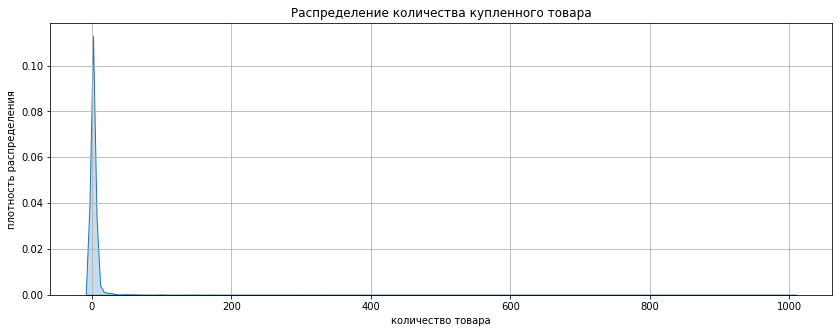

In [23]:
# Построим график распределения
kdeplot(df, 'quantity', 'количество товара', 'количества купленного товара')

In [24]:
df.loc[df['quantity'] > 100].sort_values(by='quantity', ascending=False) # проверим, что за товары покупают более 100 штук

,date,customer_id,order_id,product,quantity,price,total,month,category
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"вантуз с деревянной ручкой d14 см красный, bur...",1000,675.0,675000.0,2019-06,Хозтовары
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0,49432.0,2019-06,Хозтовары
3961,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,муляж яблоко 9 см красное,300,51.0,15300.0,2019-05,Хозтовары
1158,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"ручка-скоба рс-100 белая *трибатрон*, 1108035",200,29.0,5800.0,2018-12,Хозтовары
568,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,муляж яблоко 9 см красное,170,51.0,8670.0,2018-11,Хозтовары
211,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"крепеж для пружины дверной, 1107055",150,19.0,2850.0,2018-10,Хозтовары
212,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,пружина дверная 240 мм оцинкованная (д-19 мм) ...,150,38.0,5700.0,2018-10,Хозтовары
2431,2019-03-23 10:00:00,685d3d84-aebb-485b-8e59-344b3df8b3d3,70841,плечики пластмассовые размер 52 - 54 тула 1205158,150,20.0,3000.0,2019-03,Хозтовары
586,2018-11-02 11:00:00,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,муляж яблоко 9 см красное,140,59.0,8260.0,2018-11,Хозтовары


Это оптовые закупки. В сегменте B2B ("Business to business") следует рассматривать другой вид предложений от магазина. Например, систему скидок. 
С данными клиентами необходимо работать отдельно.

In [25]:
df_retail = df.query('quantity <= 100')# Удалим заказы с количеством более 100 шт.

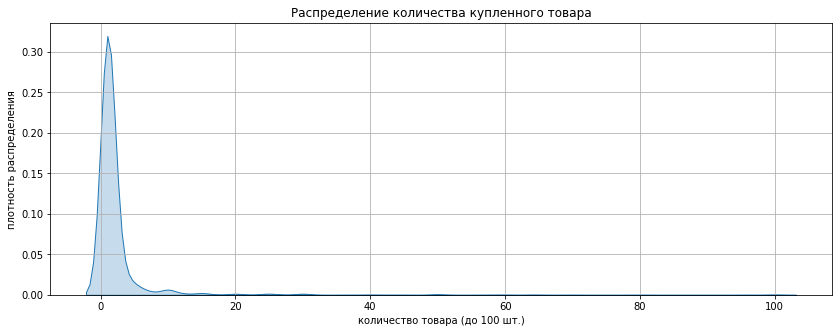

In [26]:
kdeplot(df_retail, 'quantity', 'количество товара (до 100 шт.)', 'количества купленного товара')

### Цена товара и сумма покупки товара

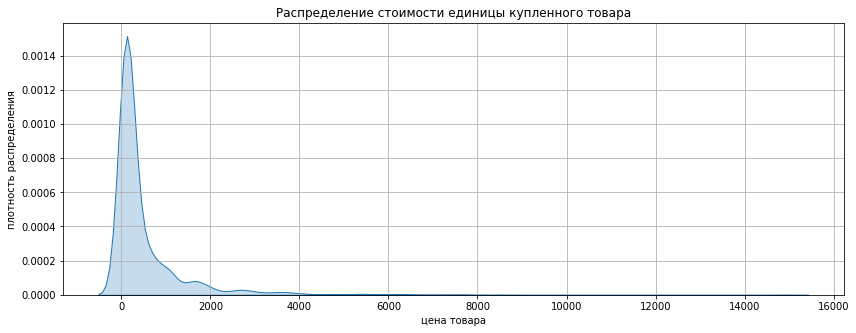

In [27]:
kdeplot(df_retail, 'price', 'цена товара', 'стоимости единицы купленного товара')

Основное число покупок приходится на цену товара до 1000. Свыше него имеются отдельные "выбросы". 
Изучим товары дороже 10 000 уе

In [28]:
df_retail.loc[df['price'] > 1000].sort_values(by='price', ascending=False) # проверим, товары дороже 1000 уе

,date,customer_id,order_id,product,quantity,price,total,month,category
5992,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,сушилка уличная leifheit 85210 linomatic v 400...,1,14917.0,14917.0,2019-07,Хозтовары
2697,2019-04-05 19:00:00,c0c60544-3a99-49d0-8a8e-cf7f293c22cb,71035,сумка-тележка хозяйственная andersen royal sho...,1,8737.0,8737.0,2019-04,Хозтовары
1981,2019-02-24 10:00:00,ac250053-a236-467a-97d2-ddbb9bf4a1ba,70423,сумка-тележка хозяйственная andersen alu star ...,1,8437.0,8437.0,2019-02,Хозтовары
2997,2019-04-21 16:00:00,19d904d8-8d16-476d-8f66-b2a3b7a23660,71227,сумка-тележка хозяйственная rolser mnb019 rojo...,1,8077.0,8077.0,2019-04,Хозтовары
6629,2019-10-16 15:00:00,d5584388-ffbe-42fd-a746-a98828ec919f,72992,стремянка 7 ступенчатая hailo 8040-707 xxl 13 ...,1,7724.0,7724.0,2019-10,Хозтовары
...,...,...,...,...,...,...,...,...,...
1448,2019-01-06 20:00:00,4809bbb1-f942-40ac-b666-7b8c771d279e,69726,"электроштопор qwerty белый 4,5?23,4 см на бата...",2,1012.0,2024.0,2019-01,Кухня
6591,2019-10-12 13:00:00,456a4d1c-390a-4ae9-8d94-bd1c97e77022,72942,лестница-стремянка dogrular ufuk al алюминевая...,1,1012.0,1012.0,2019-10,Хозтовары
1109,2018-12-05 15:00:00,f7387022-163b-492e-a496-d87b83e9f070,69217,ковер придверный ekspo 90х150 см черный рр114/...,2,1012.0,2024.0,2018-12,Хозтовары
1204,2018-12-14 14:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,69364,ковер придверный ekspo 90х150 см коричневый рр...,2,1012.0,2024.0,2018-12,Хозтовары


Аномалий не выявлено, цены в своей нише конкурентны.

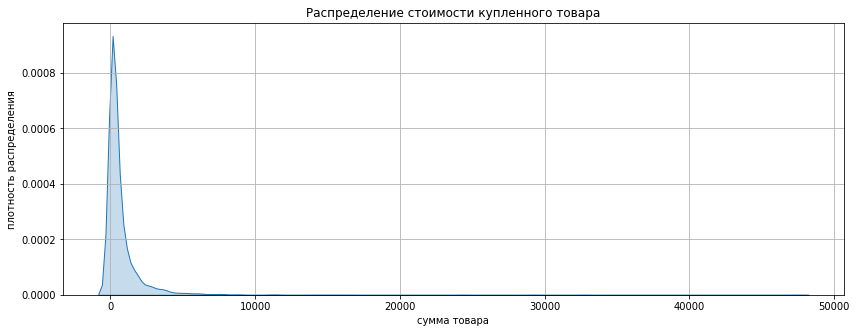

In [29]:
kdeplot(df_retail, 'total', 'сумма товара', 'стоимости купленного товара')

In [30]:
df_retail.loc[df['total'] > 10000].sort_values(by='total', ascending=False) # проверим покупки дороже 10000 уе

,date,customer_id,order_id,product,quantity,price,total,month,category
1518,2019-01-15 13:00:00,58a4c3cc-504f-43ea-a74a-bae19e665552,69830,простынь вафельная 200х180 см wellness rw180-0...,27,1755.0,47385.0,2019-01,Текстиль
1299,2018-12-21 16:00:00,6987e6d6-a63a-4ce2-a2d0-f424092d235e,69504,тележка багажная delta тбр-22 синий грузоподъе...,57,574.0,32718.0,2018-12,Хозтовары
1023,2018-11-29 17:00:00,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,69156,набор ножей attribute chef 5 предметов akf522,64,457.0,29248.0,2018-11,Хозтовары
661,2018-11-06 12:00:00,1b2764ad-9151-4051-a46a-9b01b62e6335,68878,"урна уличная ""гео"", hobbyka/хоббика, 59*37,5см...",5,4874.0,24370.0,2018-11,Хозтовары
1675,2019-02-04 06:00:00,909564b8-3a5c-4d3e-8310-5ba1c837bbd7,70080,мусорный контейнер hailo bigbin swing 45 0845-...,3,5512.0,16536.0,2019-02,Хозтовары
2971,2019-04-19 19:00:00,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,71206,одеяло wellness t142 белое темостеганое 140х20...,10,1568.0,15680.0,2019-04,Текстиль
5992,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,сушилка уличная leifheit 85210 linomatic v 400...,1,14917.0,14917.0,2019-07,Хозтовары
2970,2019-04-19 18:00:00,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,71205,наматрацник natures бархатный бамбук бб-н-1-2 ...,12,1183.0,14196.0,2019-04,Текстиль
2969,2019-04-19 18:00:00,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,71204,салфетка protec textil polyline 30х43 см амети...,60,191.0,11460.0,2019-04,Хозтовары
4435,2019-06-04 07:00:00,940c175f-ea87-44e0-9e16-0a3d0a9abecd,71598,скатерть круглая d-175 см 50% полиэстер 50% хл...,10,1140.0,11400.0,2019-06,Текстиль


Всего 12 покупок дороже 10000 уе. Этим клиентам стоит уделить  больше внимания.

In [31]:
df_category=df_retail.groupby('category').agg({'order_id':'nunique', 'product':'nunique',  'total':'mean', 'total':'sum',}).sort_values(by='order_id', ascending=False).round(2)
df_category['avg_order'] = df_category['total']/df_category['order_id']
df_category.round(2)

,order_id,product,total,avg_order
category,,,,
Хозтовары,1678,1059,2355134.0,1403.54
Растения,777,944,512083.0,659.05
Кухня,219,218,178228.0,813.83
Текстиль,138,117,285512.0,2068.93


- Самая покупаемая категория по заказам - Хозтовары. Соотвестсвенно и самая большая сумма продаж. В ней больше всего товаров.
- на втором месте товары категории Растения
- Самый высокий средний чек - Тестиль, но самый низкие показатели по количеству покупок.

In [32]:
df_order=df.groupby('order_id').agg({'product':'nunique', 'quantity':'sum', 'price':'sum',\
                                           'category':'nunique'}).\
        sort_values(by='category', ascending=False).reset_index()

df_order.head(32)

,order_id,product,quantity,price,category
0,68521,5,5,567.0,3
1,68567,3,4,2923.0,3
2,68610,10,12,2280.0,3
3,69090,11,11,2109.0,3
4,68712,5,6,1473.0,3
5,68941,17,28,1780.0,3
6,69101,10,10,2166.0,2
7,69100,6,10,275.0,2
8,68773,10,20,301.0,2
9,68768,3,3,1797.0,2


Большинство заказов содержат товар 1 категории. 30 заказов имеют товары более 1 категории в составе.

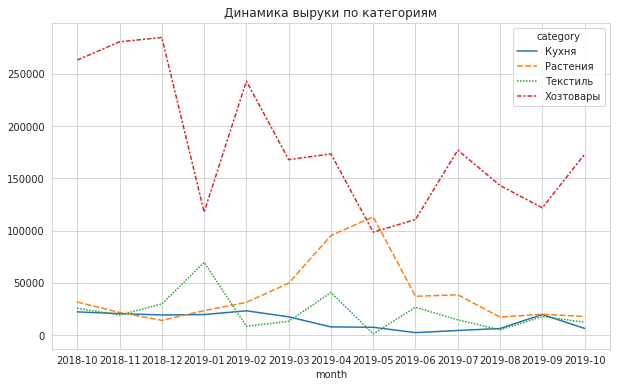

In [33]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
g = sns.lineplot(data=df_retail.pivot_table(index = 'month', columns = 'category', 
                                            values = 'total', aggfunc = 'sum'))
g.set (title= 'Динамика выруки по категориям');

In [34]:
# Создадим таблицу с количеством заказов по пользователям
df_customers = (df_retail
                           .drop(['date', 'product', 'price'], axis=1)
                           .groupby(['category', 'customer_id'], as_index=False)
                           .agg({'order_id': pd.Series.nunique, 'total': 'sum', 'quantity':'sum'})
                           .reset_index()
                      )

# Переименуем колонки
df_customers.columns = ['id', 'category', 'customer_id', 'orders', 'total', 'quantity']
df_customers.head()

,id,category,customer_id,orders,total,quantity
0,0,Кухня,018dc738-2846-464d-a421-126a8ed64bc5,1,940.0,10
1,1,Кухня,036118cf-c198-48fa-ba15-6d841482a56d,2,1926.0,18
2,2,Кухня,036d75ea-b633-41a8-8974-3f84fee8c65e,1,2399.0,1
3,3,Кухня,036edc2c-d0ad-4c71-99f6-226db1b883f4,1,478.0,2
4,4,Кухня,052616d4-286c-4ae0-87ec-6d7f1c41f56f,1,1424.0,2


### Выбросы по количеству заказов по пользователям

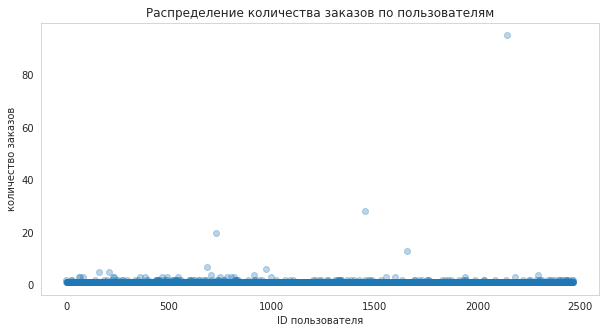

In [35]:
# Построим график
fig, ax = plt.subplots(figsize=(10,5))
ax.set(title='Распределение количества заказов по пользователям', xlabel='ID пользователя', ylabel='количество заказов')
#for category in df_customers['category'].unique():
    #df_filtered = df_customers.query('category == @category')
ax.scatter(df_customers['id'], df_customers['orders'], alpha = 0.3)#, label=category)#df_filtered['id'], df_filtered['orders'],
#ax.legend(bbox_to_anchor=(1, 1))
ax.grid()
plt.show()

Основная масса покупателей делает 1, редко 2 заказа. Большие выбросы по количеству заказов в Хозтоварах - более 10 и более 70. Изменим масштаб графика для отображения не более 10 заказов

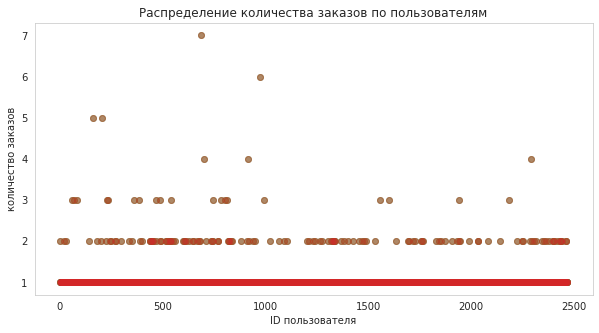

In [36]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set(title='Распределение количества заказов по пользователям', xlabel='ID пользователя', ylabel='количество заказов')
for category in df_customers.query('orders <= 10')['category'].unique():
    df_filtered = df_customers.query('orders <= 10')
    ax.scatter(df_filtered['id'], df_filtered['orders'], alpha = 0.3, label=category)
#ax.legend(bbox_to_anchor=(1, 1))
ax.grid()
plt.show()

Присутствуют выбросы более 3 заказов. Необходимо определить порог очистки данных от выбросов.

In [37]:
# Функция перцентилей
def percentile(df, column):
    perc90 = np.percentile(df[column], 90)
    perc95 = np.percentile(df[column], 95)
    perc99 = np.percentile(df[column], 99)
    print('90-й, 95-й и 99-й перцентили равны, соответственно, {:.1f}, {:.1f}, {:.1f}.'.format(perc90, perc95, perc99))

In [38]:
print('Показатели количества заказов на пользователя:')
percentile(df_customers, 'orders')

Показатели количества заказов на пользователя:
90-й, 95-й и 99-й перцентили равны, соответственно, 1.0, 2.0, 3.0.


- 3 и более заказов оформили менее 1% пользователей
- менее 5% - 2 и более заказов. 
- менее 10% пользователей заказывали более 1 раза.
- нижняя граница аномального числа заказов- 3 заказа. По ней будем "очищать" данные.

### Выбросы по стоимости покупок

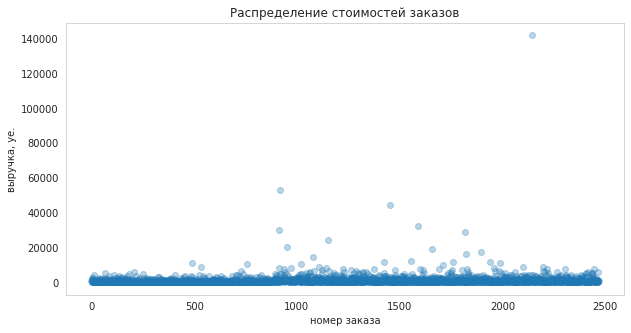

In [39]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set(title='Распределение стоимостей заказов', xlabel='номер заказа', ylabel='выручка, уе.')
#for category in df_customers['category'].unique():
    #df_filtered = df_customers.query('category == @category')
ax.scatter(df_customers['id'], df_customers['total'], alpha = 0.3, label=category)
#ax.legend(bbox_to_anchor=(1, 1))
ax.grid()
plt.show()

In [40]:
df_customers['total']

0        940.0
1       1926.0
2       2399.0
3        478.0
4       1424.0
         ...  
2463    1401.0
2464    1649.0
2465     397.0
2466     389.0
2467     577.0
Name: total, Length: 2468, dtype: float64

Имеется несколько выбросов по сумме выше 15 000, как отмечалось ранее - это дорогие товары или большое количество. Уменьшим масштаб, ограничим 20 00 сумму

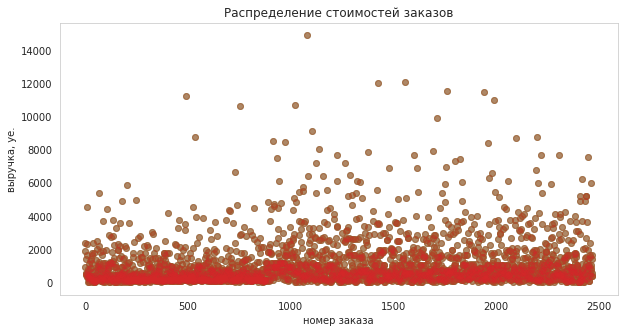

In [41]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set(title='Распределение стоимостей заказов', xlabel='номер заказа', ylabel='выручка, уе.')
for category in df_customers[df_customers['total'] < 15000]['category'].unique():
    df_filtered = df_customers[df_customers['total'] < 15000]
    ax.scatter(df_filtered['id'], df_filtered['total'], alpha = 0.3, label=category)
#ax.legend(bbox_to_anchor=(1, 1))
ax.grid()
plt.show()

In [42]:
print('Показатели стоимостей заказов:')
percentile(df_customers, 'total')

Показатели стоимостей заказов:
90-й, 95-й и 99-й перцентили равны, соответственно, 2917.1, 4093.2, 8606.3.


- менее 1% пользователей заказали на сумму свыше 8419
- менее 5% - более 4122,2 
- менее 10% пользователей заказывали на сумму более 2849
- нижняя граница аномальной суммы заказа - 8400 уе. По ней будем "очищать" данные.

### Подготовим очищенные данные 

In [43]:
# Срезы данных для аномальных пользователей
df_customers_orders = df_customers.query('orders > 3')['customer_id']# По количеству заказаов более 2
df_customers_total = df_customers.query('total >= 8610')['customer_id']# По сумме покупки более 8400 уе.

# Число аномальных пользователей
anomal_visitors = pd.concat([df_customers_orders, df_customers_total], axis = 0).drop_duplicates().sort_values()
len(anomal_visitors)

28

In [44]:
df_retail_filt = df_retail[np.logical_not(df_retail['customer_id'].isin(anomal_visitors))]
df_retail_filt.head()

,date,customer_id,order_id,product,quantity,price,total,month,category
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,2018-10,Растения
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,194.0,2018-10,Растения
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,112.0,2018-10,Растения
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0,2018-10,Растения
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,112.0,2018-10,Растения


### Выводы по исследованию данных:
- В очищенном датасете имеются данные по покупкам 2451 клиента, 2784 покупки - повторная покупка редкость;
- Всего 2341 продукт в ассортименте;
- Товары поделили на 4 категории;
- Присутствуют несколько выбросов по количеству товара (9 заказов). При медиане количества 1 - есть огромный выброс в 1000 единиц;
- Присутствуют выбросы по цене и по стоимости. При медиане прайса 150 уе, есть выброс до 14917 уе. Всего более 10 000 уе - 721 транзакция;
- Оптовые покупки - более 100 единиц товара - были удалены. По ним будут сделаны отдельные рекомендации по реактивации;
- Выбросы по цене и стоимости покупки оставили в Датасете - они релевантны ценам рынка.
- Самая покупаемая категория - Хозтовары.
- Самая доходная категория по total продаж - Текстиль


## Сегментирование пользователей

### Кластеризируем пользователей с помощью машинного обучения

In [45]:
# сгруппируем датасет по заказам
grouped_by_orders = df_retail_filt.groupby(['customer_id', 'order_id']).agg({'total':'sum', 
                                                                 'price':'mean', 'product':'count', 'quantity':'sum', 
                                                                 'date':'first', 'category': 'count'}).reset_index()
grouped_by_orders = grouped_by_orders.rename(columns={'total':'total_price', 'price':'avg_price_of_product', 
                                                      'product':'products_in_order', 'quantity':'quantity_in_order', 
                                                      'category': 'category_count' })

In [46]:
# сгруппируем датасет по пользователям
grouped_by_customers = grouped_by_orders.groupby('customer_id').agg({'order_id':'nunique', 
                                                                     'total_price':['sum', 'mean'], 
                                                                     'avg_price_of_product':'mean', 
                                                                     'products_in_order':'mean', 
                                                                     'quantity_in_order':'mean'})
grouped_by_customers.columns = ['orders', 'total_revenue', 'avg_order_price', 'avg_price_of_product', 
                                'avg_products_in_order', 'avg_quantity_in_order']
grouped_by_customers.head()

,orders,total_revenue,avg_order_price,avg_price_of_product,avg_products_in_order,avg_quantity_in_order
customer_id,,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,1,555.0,555.0,138.75,4.0,4.0
001cee7f-0b29-4716-b202-0042213ab038,1,442.0,442.0,442.00,1.0,1.0
00299f34-5385-4d13-9aea-c80b81658e1b,1,914.0,914.0,457.00,1.0,2.0
002d4d3a-4a59-406b-86ec-c3314357e498,1,1649.0,1649.0,1649.00,1.0,1.0
003bbd39-0000-41ff-b7f9-2ddaec152037,1,2324.0,2324.0,1162.00,1.0,2.0


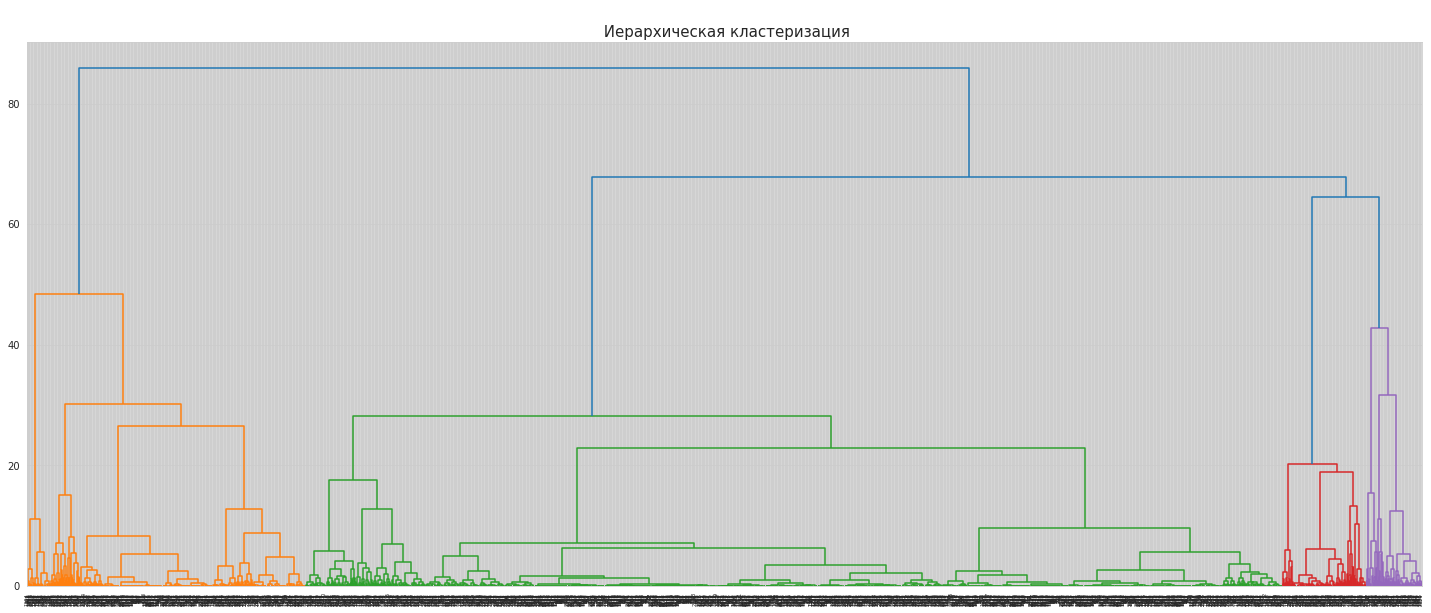

In [47]:
cluster = grouped_by_customers.reset_index()
X = cluster.drop(['customer_id'], axis = 1)
scaler = StandardScaler()
X_st = scaler.fit_transform(X)
linked = linkage(X_st, method='ward')
plt.figure(figsize=(25, 10))
dendrogram(linked, orientation='top')
plt.title('\n Иерархическая кластеризация', fontsize=15)
plt.show()
km = KMeans(n_clusters = 4, random_state = 0)
labels = km.fit_predict(X_st)
cluster['cluster_km'] = labels


In [48]:
cluster.sample(3)

,customer_id,orders,total_revenue,avg_order_price,avg_price_of_product,avg_products_in_order,avg_quantity_in_order,cluster_km
1989,d6a985fa-b1dc-4b2b-bb84-eb541587ccd2,1,852.0,852.0,213.0,2.0,4.0,0
297,1f9af411-ce8f-4bb8-ba54-28c032df23eb,1,2527.0,2527.0,2527.0,1.0,1.0,1
1590,ae6940d3-a1c7-4997-8853-a5b8afc60d51,1,1799.0,1799.0,1799.0,1.0,1.0,0


In [49]:
cluster_count=cluster.groupby('cluster_km').agg({'customer_id':'nunique'}).sort_values(by='customer_id', ascending=False).round(2)

cluster_count

,customer_id
cluster_km,
0,1867
1,246
2,137
3,135


##### Создадим таблицу с данными и кластерами

In [50]:
df_clusters = df_retail_filt.merge(cluster.reset_index(), on='customer_id')#сырые данные
df_clusters.drop('index', axis = 1).sample(3)

,date,customer_id,order_id,product,quantity,price,total,month,category,orders,total_revenue,avg_order_price,avg_price_of_product,avg_products_in_order,avg_quantity_in_order,cluster_km
132,2018-10-09 07:00:00,3bc760df-7192-4ebc-9403-21ad69060f00,68578,"сушилка для белья потолочная лиана 2,2 м 1703010",2,697.0,1394.0,2018-10,Хозтовары,1,2083.0,2083.0,693.0,2.0,3.0,0
1256,2019-02-05 20:00:00,673d44a3-9cec-4c2f-b0c6-9be4952ddc7c,70114,вешалка-плечики без эссенции цвет тёмно-розовы...,30,40.0,1200.0,2019-02,Хозтовары,1,1200.0,1200.0,40.0,1.0,30.0,2
4459,2019-10-30 12:00:00,78b878f7-7f2d-4069-bcf0-0e3531583696,73142,искусственный цветок ромашка пластик 45 см,4,22.0,88.0,2019-10,Хозтовары,1,88.0,88.0,22.0,1.0,4.0,0


### Проверим статистическую значимость деления на кластеры

Создадим функцию


In [51]:
def stat(df1, df2, parametr):
    alpha = 1-(1-0.05)**15 # критический уровень статистической значимости c учетом множественного теста
    results = st.mannwhitneyu(list(df1[parametr]), list(df2[parametr]))
    print('p-value:', results.pvalue)
    if (results.pvalue < alpha):
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')

Создадим ДатаФреймы по кластерам

In [52]:
cl_0 = df_clusters.query('cluster_km == 0')
cl_1 = df_clusters.query('cluster_km == 1')
cl_2 = df_clusters.query('cluster_km == 2')
cl_3 = df_clusters.query('cluster_km == 3')

#### Проверим статистическую значимость деления на кластеры по Total
##### Гипотеза H0:
- Для различных кластеров клиентов, total не отличается от аналогичного показателя другого кластера.
##### Гипотеза H1:
- Между показателями наблюдаются существенные различия.

In [53]:
stat(cl_0, cl_1, 'total')

p-value: 5.72781419138839e-150
Отвергаем нулевую гипотезу


In [54]:
stat(cl_0, cl_2, 'total')

p-value: 1.6825144126248577e-166
Отвергаем нулевую гипотезу


In [55]:
stat(cl_0, cl_3, 'total')

p-value: 6.601671471902804e-16
Отвергаем нулевую гипотезу


In [56]:
stat(cl_1, cl_2, 'total')

p-value: 4.2553998163504483e-141
Отвергаем нулевую гипотезу


In [57]:
stat(cl_1, cl_3, 'total')

p-value: 2.4490428051862036e-110
Отвергаем нулевую гипотезу


In [58]:
stat(cl_2, cl_3, 'total')

p-value: 4.1018825177490856e-33
Отвергаем нулевую гипотезу


#### Отвергаем гипотезу Н0

### Проверим статистическую значимость деления на кластеры по цене товара
#### Гипотеза H0:
- Для различных кластеров, цена товара не отличается от аналогичного показателя другого кластера.
#### Гипотеза H1:
- Между показателями наблюдаются существенные различия.

In [59]:
stat(cl_0, cl_1, 'price')

p-value: 4.390423616008248e-133
Отвергаем нулевую гипотезу


In [60]:
stat(cl_0, cl_2, 'price')

p-value: 2.9282417968739994e-174
Отвергаем нулевую гипотезу


In [61]:
stat(cl_0, cl_3, 'price')

p-value: 6.970931360988331e-18
Отвергаем нулевую гипотезу


In [62]:
stat(cl_1, cl_2, 'price')

p-value: 3.588340552467353e-145
Отвергаем нулевую гипотезу


In [63]:
stat(cl_1, cl_3, 'price')

p-value: 1.4388375382338393e-104
Отвергаем нулевую гипотезу


In [64]:
stat(cl_2, cl_3, 'price')

p-value: 5.133096421408227e-32
Отвергаем нулевую гипотезу


#### Отвергаем гипотезу Н0

In [65]:
df_clusters.describe()

,order_id,quantity,price,total,index,orders,total_revenue,avg_order_price,avg_price_of_product,avg_products_in_order,avg_quantity_in_order,cluster_km
count,4469.000000,4469.000000,4469.000000,4469.000000,4469.00000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000
mean,47305.389125,2.155068,483.618259,602.890803,1188.35377,1.166704,1455.062430,1303.216902,483.943107,6.381778,8.862087,0.978966
std,27566.237274,5.441632,870.916620,983.260943,685.63640,0.451994,1294.839679,1186.975947,865.839775,8.931160,11.647641,1.127108
min,12624.000000,1.000000,9.000000,9.000000,0.00000,1.000000,14.000000,14.000000,14.000000,1.000000,1.000000,0.000000
25%,14766.000000,1.000000,90.000000,120.000000,594.00000,1.000000,507.000000,464.000000,104.000000,1.000000,1.000000,0.000000
50%,68844.000000,1.000000,149.000000,188.000000,1157.00000,1.000000,1067.000000,964.000000,149.000000,2.000000,4.000000,0.000000
75%,70903.000000,1.000000,464.000000,674.000000,1814.00000,1.000000,2050.000000,1784.000000,464.000000,8.000000,12.000000,2.000000
max,73162.000000,100.000000,8437.000000,8437.000000,2384.00000,3.000000,8437.000000,8437.000000,8437.000000,51.000000,100.000000,3.000000


## Исследуем поведение покупателей по кластерам

### Средняя покупка по кластерам в разрезе категорий

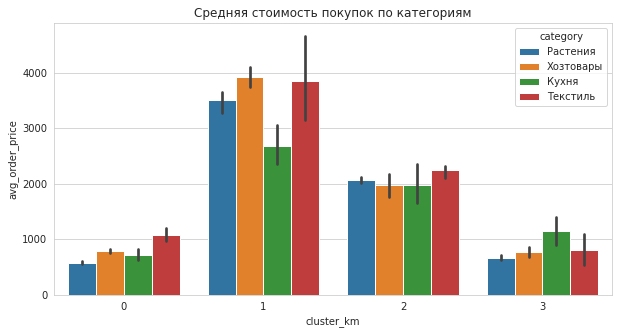

In [66]:
plt.figure(figsize=(10, 5))
sns.barplot(x="cluster_km", y="avg_order_price", hue="category", data=df_clusters).\
    set (title= 'Средняя стоимость покупок по категориям');


### Средняя цена товара по кластерам в разрезе категорий

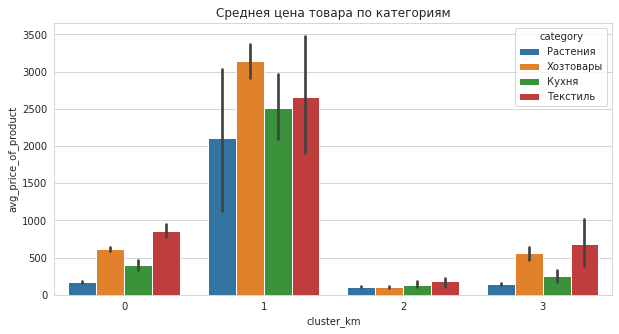

In [67]:
plt.figure(figsize=(10, 5))
sns.barplot(x="cluster_km", y="avg_price_of_product", hue="category", data=df_clusters).\
    set (title= 'Среднея цена товара по категориям');


###  Количество покупок по категориям

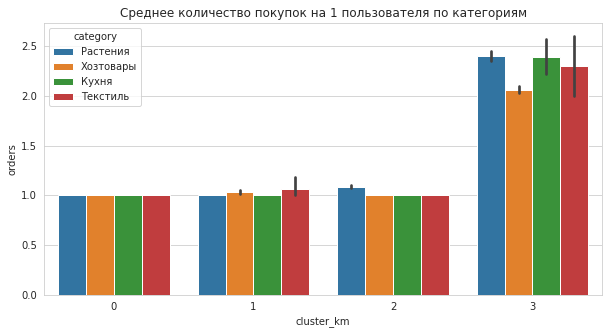

In [68]:
plt.figure(figsize=(10, 5))
sns.barplot(x="cluster_km", y="orders", hue="category", data=df_clusters).\
    set (title= 'Среднее количество покупок на 1 пользователя по категориям');

###  Выручка с покупателя по категориям

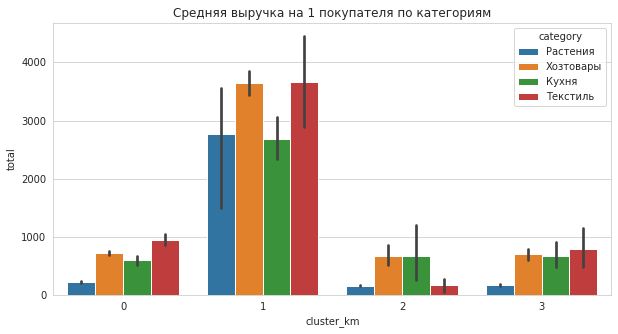

In [69]:
plt.figure(figsize=(10, 5))
sns.barplot(x="cluster_km", y="total", hue="category", data=df_clusters).\
    set (title= 'Средняя выручка на 1 покупателя по категориям');

### Промежуточный вывод:
- Средняя покупка (средний чек):
    - Кластер 0 - все категории колеблются до 1100, выделяются категория Текстиль - выше 1000
    - Кластер 1 - самый доходный, 3 категории выше 3 000 
    - во 2 кластере ок. 2000 - во всех категориях
    - в 3 кластере все категории, кроме Кухни ниже 1000

- Средняя цена товара в заказах по категориям:
    - самый дорогой товар в 1 кластере, особенно Хозтовары
    - В 1 кластере товар до 1000 р.
    - Средняя цена во 2 кластере самая низкая - до 300 
    - в 3 кластере ниже 1000 рублей, лидер Текстиль 700.

- Частота покупок в магазине:
    - 0, 1 и 2 кластеры - в среднем по 1 покупке на пользователя в каждой категории
    - 3 кластер - более 2 покупок, Растения лидер по количеству покупок

- Средняя выручка с покупателя по кластерам:
    - 0 кластер - до 1000, лидер - Текстиль, ок 1000
    - 1 кластер -Текстиль 3600, хозтовары - 3500, остальные 2600
    - во 2 кластере - все до 700, Хозтовары и Кухня - 700
    - в 3 кластере Текстиль - 800

Средняя покупка не сильно отличается от выручки с клиента, т.к. средняя частота заказов 1,17

### Сезонные показатели выручки по кластерам

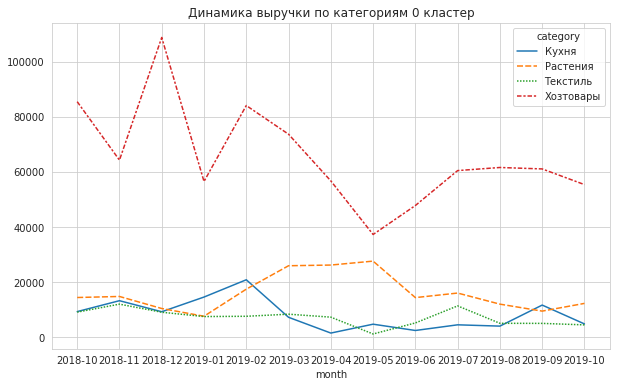

In [70]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
g = sns.lineplot(data=df_clusters.query('cluster_km == 0').pivot_table(index = 'month', columns = 'category', \
                       values = 'total', aggfunc = 'sum'))
g.set (title= 'Динамика выручки по категориям 0 кластер');

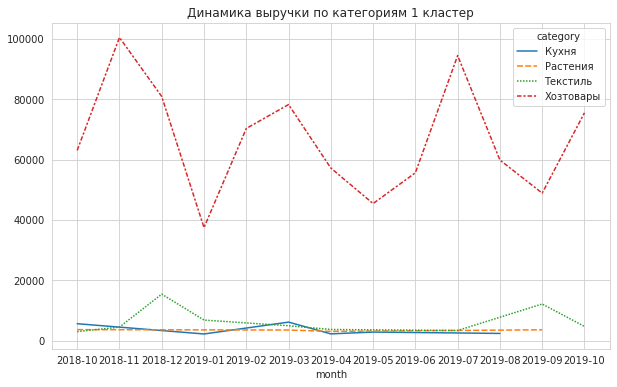

In [71]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
g = sns.lineplot(data=df_clusters.query('cluster_km == 1').pivot_table(index = 'month', columns = 'category', \
                       values = 'total', aggfunc = 'sum'))
g.set (title= 'Динамика выручки по категориям 1 кластер');

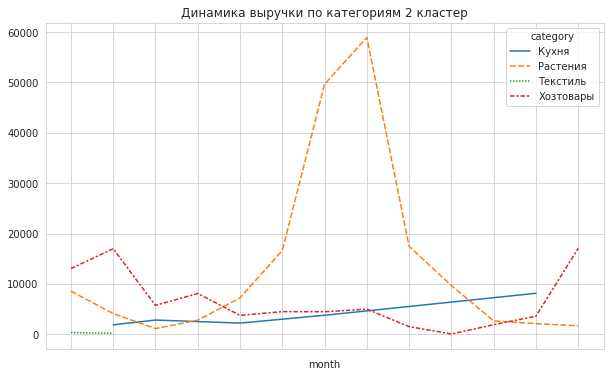

In [72]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
g = sns.lineplot(data=df_clusters.query('cluster_km == 2').pivot_table(index = 'month', columns = 'category', \
                       values = 'total', aggfunc = 'sum'))
g.set_xticklabels(g.get_xticklabels(), rotation=30)
g.set (title= 'Динамика выручки по категориям 2 кластер');

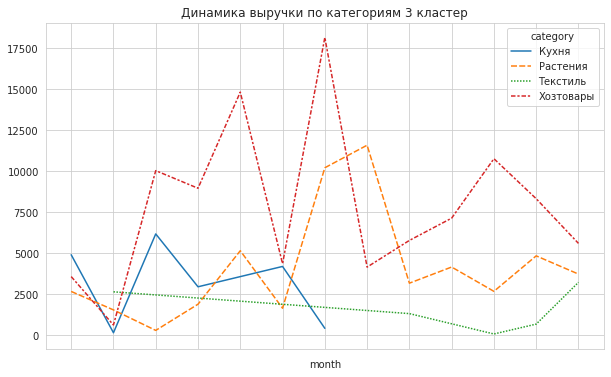

In [73]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
g = sns.lineplot(data=df_clusters.query('cluster_km == 3').pivot_table(index = 'month', columns = 'category', \
                       values = 'total', aggfunc = 'sum'))
g.set_xticklabels(g.get_xticklabels(), rotation=30)
g.set (title= 'Динамика выручки по категориям 3 кластер');

### Пиковый оборот по категориям в кластерах:
- 0 кластер: Хозтовары - декабрь и февраль; Растения - март - май;
- 1 кластер: Хозтовары - ноябрь и июль, март; остальные категории без пиков
- 2 кластер: Растения - апрель и май; Хозтовары - октябрь
- 3 кластер: Хозтовары - февраль, апрель, август; Растения - апрель, май

## Вывод:
#### Анализ данных:
- Данные предоставлены с неявными дубликатами - были очищены;
- Выявлены несколько оптовых закупок - вычищены;
- Изменены типы данных в столбцах;
- Товары в данных не распределены на категории - распределено в исследовании, на основании 1 слова в названии;
- Изучены данные на показатели: количество товаров в заказе, количество категорий в заказе, цена товра, сумма заказа
- Подготовлены очищенные от выбросов данные.
#### Сегментация пользователей:
- Проведена сегментация с помощью машинного обучения;
- Создан сводный датасет с очищенными данными;
- Проверены 2 показателя на корректность деления на кластеры:
    - Гипотезы: Н0-показатель не отличается между кластерами, Н1 - показатель имеет значительные различия 
    - 1 проверка - Общая стоиимость - одна пара кластеров не имеет различия, остальные существенно различаются. Н0 отвергнута;
    - 2 проверка - средняя покупка - все пары кластеров имеют существенные различия. Н0 отвергнута;
- Кластеризация проведена корректно.
#### Исследование показателей по кластерам в разрезе категорий:
- Средняя покупка (средний чек):
    - Кластер 0 - все категории колеблются до 1100, выделяются категория Текстиль - выше 1000
    - Кластер 1 - самый доходный, 3 категории выше 3 000
    - во 2 кластере ок. 2000 - во всех категориях
    - в 3 кластере все категории, кроме Кухни ниже 1000
- Средняя цена товара в заказах по категориям:
    - самый дорогой товар в 1 кластере, особенно Хозтовары
    - В 1 кластере товар до 1000 р.
    - Средняя цена во 2 кластере самая низкая - до 300
    - в 3 кластере ниже 1000 рублей, лидер Текстиль 700.
- Частота покупок в магазине:
    - 0, 1 и 2 кластеры - в среднем по 1 покупке на пользователя в каждой категории
    - 3 кластер - более 2 покупок, Растения лидер по количеству покупок
- Средняя выручка с покупателя по кластерам:
    - 0 кластер - до 1000, лидер - Текстиль, ок 1000
    - 1 кластер -Текстиль 3600, хозтовары - 3500, остальные 2600
    - во 2 кластере - все до 700, Хозтовары и Кухня - 700
    - в 3 кластере Текстиль - 800
- Средняя покупка не сильно отличается от выручки с клиента, т.к. средняя частота заказов 1,17
- Пиковый оборот выручки по кластерам:
    - 0 кластер: Хозтовары - декабрь и февраль; Растения - март - май;
    - 1 кластер: Хозтовары - ноябрь и июль, март; остальные категории без пиков
    - 2 кластер: Растения - апрель и май; Хозтовары - октябрь
    - 3 кластер: Хозтовары - февраль, апрель, август; Растения - апрель, май

    
### Рекомендации:
- Обратить внимание на клиентов В2В сегмента, возможно проработать особые условия для них, сделать КП для схожих по профилю клиентов;

- Рекламная рассылка согласно матрице:
|Категория | Хозтовары| Растения | Кухня    | Текстиль |
|:----------:|:----------:|:----------:|:----------:|:----------:|
| Кластер 0  |12, 02    |  04, 05  |    |   |
| Кластер 1  |11, 07, 03   |    |    |    |
| Кластер 2  |  10  | 04, 05   |   |    |
| Кластер 3  | 02, 04, 08   |  04,05  |   |    |

- Кухня и Тестиль - очень маленький ассортимент.
- Дополнительно, рассмотреть увеличение ассортимента Текстиля - высокая средняя цена и выручка в кластере при низком ассортименте.
- Произвести рассылку с предложением перекрестной категории - информирование о наличии ассортимента.

In [74]:
# выгрузим файл для дашборда. Взял файл без оптовиков с выбросами по количеству заказов и суммам.
#df_retail.to_csv(r'C:\\Users\\dema02\\Untitled Folder\\df_retail.csv')